In [35]:
import math
from typing import Optional, Tuple, Dict, Callable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *

In [36]:
df = sns.load_dataset("mpg") # Utilizamos el dataset de mpg, que tiene variables numericas, categoricas y variable objetivo continuo

In [37]:
df.head() # es un dataset sobre coches

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [38]:
df["origin"] = df["origin"].astype("category")
df["name"] = df["name"].astype("category")
X = df.iloc[:, 1:]
y = df['mpg']

In [39]:
# Vamos a discretizar la variable y ('mpg') igual de anchura y frequencia
y_width, edges = equal_width_discretize(y, n_bins=5)

y_freq = equal_frequency_discretize(y, n_bins=5)

In [40]:
edges # como podemos ver todos los rangos son del mismo tamaño (7 mas o menos)

array([ 9.  , 16.52, 24.04, 31.56, 39.08, 46.6 ])

In [41]:
y_freq.value_counts() # existen algunos bins con mas valores que otros. Esto sucede porque en los bordes existen mas de un valor igual

bin_0    87
bin_3    84
bin_2    80
bin_4    74
bin_1    73
dtype: int64

In [42]:
variance(X["acceleration"]) # por ejemplo calculamos la varianza de la variable numerica "acceleration"

7.604848233611383

In [43]:
entropy(X["origin"]) # por ejemplo calculamos la entropia de la variable categorica "origin"

1.3273558482394003

In [44]:
# Para calcular el auc vamos a transformar el target en binario de igual de frecuencias
y_bin = equal_frequency_discretize(y, n_bins=2)
y_bin = y_bin.map({'bin_0': 0, 'bin_1': 1})

In [45]:
auc(X['horsepower'], y_bin) # ahora evaluamos una varibale numerica como "horsepower" con la columna binaria

0.0844789356984479

In [46]:
metrics = compute_metrics(X, y_bin)

In [47]:
metrics # Resumen de las metricas por atributo

,type,variance,auc,entropy
attribute,,,,
cylinders,numeric,2.893415,0.102676,NaN
displacement,numeric,10872.199152,0.064079,NaN
horsepower,numeric,1481.569393,0.084479,NaN
weight,numeric,717140.990526,0.055037,NaN
acceleration,numeric,7.604848,0.679756,NaN
model_year,numeric,13.672443,0.758037,NaN
origin,categorical,NaN,NaN,1.327356
name,categorical,NaN,NaN,8.075325


In [48]:
# Vamos a normalizar la variable de "weight" de dos maneras diferentes, se puede asignar a una variable del dataset o a objeto
weight_norm = normalize_series(X["weight"], new_min=0.0, new_max=1.0)
weight_z = standardize_series(X["weight"])

In [49]:
# Ahora creamos un nuevo X con las variables numericas normalizadas entre 1 y 0
X_norm = normalize_dataframe(X.copy(), method="normalize", new_min=0.0, new_max=1.0)

In [50]:
X_norm

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,usa,chevrolet chevelle malibu
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,usa,buick skylark 320
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,usa,plymouth satellite
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,usa,amc rebel sst
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,usa,ford torino
...,...,...,...,...,...,...,...,...
393,0.2,0.186047,0.217391,0.333711,0.452381,1.0,usa,ford mustang gl
394,0.2,0.074935,0.032609,0.146583,0.988095,1.0,europe,vw pickup
395,0.2,0.173127,0.206522,0.193365,0.214286,1.0,usa,dodge rampage
396,0.2,0.134367,0.179348,0.286929,0.630952,1.0,usa,ford ranger


In [52]:
metrics = compute_metrics(X_norm, y_bin) # las metricas del dataset normalizado
metrics

,type,variance,auc,entropy
attribute,,,,
cylinders,numeric,0.115737,0.102676,NaN
displacement,numeric,0.072593,0.064079,NaN
horsepower,numeric,0.043761,0.084479,NaN
weight,numeric,0.057649,0.055037,NaN
acceleration,numeric,0.026945,0.679756,NaN
model_year,numeric,0.094948,0.758037,NaN
origin,categorical,NaN,NaN,1.327356
name,categorical,NaN,NaN,8.075325


In [59]:
# Mediante un diccionario de reglas vamos a filtrar las columnas que no cumplan las condiciones

rules = {
    "variance": lambda v: True if pd.isna(v) else (v < 0.1), # varianza menos que 0.1 (se elimina "cylinders")
    "entropy": lambda v: True if pd.isna(v) else (v < 5) # entropia menos que 5 (se elimina "name")
    }
X_filtered = filter_variables(X_norm, metrics, rules)

In [ ]:
X_filtered # dataset filtrado, sin "cylinders" y "name"

,displacement,horsepower,weight,acceleration,model_year,origin
0,0.617571,0.456522,0.536150,0.238095,0.0,usa
1,0.728682,0.646739,0.589736,0.208333,0.0,usa
2,0.645995,0.565217,0.516870,0.178571,0.0,usa
3,0.609819,0.565217,0.516019,0.238095,0.0,usa
4,0.604651,0.510870,0.520556,0.148810,0.0,usa
...,...,...,...,...,...,...
393,0.186047,0.217391,0.333711,0.452381,1.0,usa
394,0.074935,0.032609,0.146583,0.988095,1.0,europe
395,0.173127,0.206522,0.193365,0.214286,1.0,usa
396,0.134367,0.179348,0.286929,0.630952,1.0,usa


In [62]:
mutual_information_discrete(X_norm["origin"].astype(str), X_norm["name"].astype(str)) # mutual information entre dos categoricas

1.3273558482393961

In [ ]:
M = pairwise_correlation_mi(X_norm, n_bins_for_continuous=5)
M # hay valores mas altos que 1 en caso de comparar categoricos ya que se calcula la MI (mutual information)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
cylinders,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,0.335129,1.419421
displacement,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,0.484180,2.164814
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.263896,2.122944
weight,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,0.345591,2.154282
acceleration,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.087862,1.976755
model_year,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.029853,1.947384
origin,0.335129,0.484180,0.263896,0.345591,0.087862,0.029853,1.327356,1.327356
name,1.419421,2.164814,2.122944,2.154282,1.976755,1.947384,1.327356,8.075325


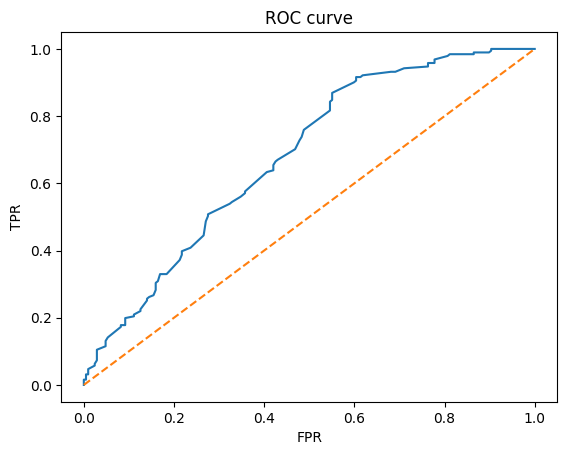

In [ ]:
fpr, tpr = plot_roc_curve(X_norm["acceleration"], y_bin) # se ve que con esta variable se distingue razonablemente entre las dos clases, ya que esta sobre la linea naranja

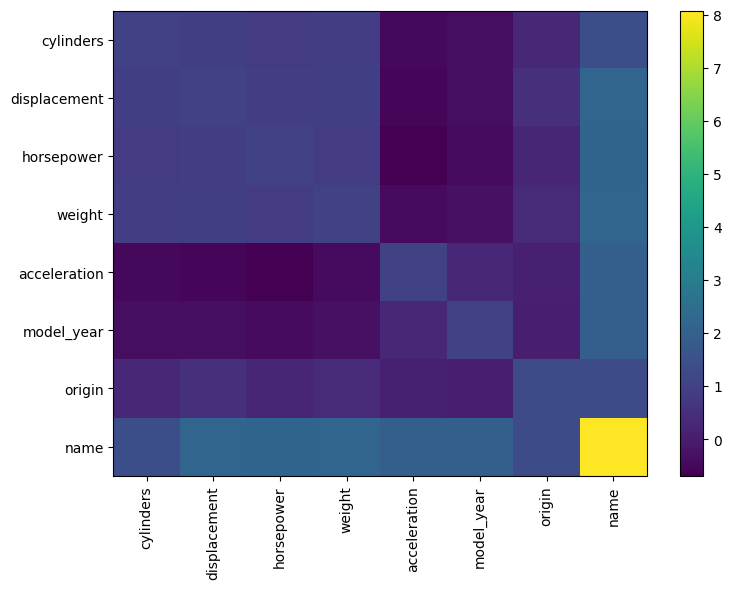

<AxesSubplot: >

In [ ]:
plot_matrix_heatmap(M) # mapa de calor de la matrzi calculada